<a href="https://colab.research.google.com/github/rishikesh715/ADM/blob/main/RL_Assg_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Implementing Value Iteration and Policy Iteration for simple MDPs.

In [8]:
import gymnasium as gym
import numpy as np

# Create the FrozenLake environment (non-slippery for deterministic behavior)
env = gym.make("FrozenLake-v1", is_slippery=False)

n_states = env.observation_space.n
n_actions = env.action_space.n
gamma = 0.99
theta = 1e-8


def value_iteration(env):
    V = np.zeros(n_states)
    while True:
        delta = 0
        for s in range(n_states):
            q_values = []
            for a in range(n_actions):
                q = 0
                for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                    q += prob * (reward + gamma * V[next_state])
                q_values.append(q)
            max_q = max(q_values)
            delta = max(delta, abs(V[s] - max_q))
            V[s] = max_q
        if delta < theta:
            break

    # Derive policy
    policy = np.zeros(n_states, dtype=int)
    for s in range(n_states):
        q_values = []
        for a in range(n_actions):
            q = 0
            for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                q += prob * (reward + gamma * V[next_state])
            q_values.append(q)
        policy[s] = np.argmax(q_values)
    return policy, V


def policy_iteration(env):
    policy = np.zeros(n_states, dtype=int)
    V = np.zeros(n_states)

    while True:
        # Policy Evaluation
        while True:
            delta = 0
            for s in range(n_states):
                v = 0
                a = policy[s]
                for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                    v += prob * (reward + gamma * V[next_state])
                delta = max(delta, abs(V[s] - v))
                V[s] = v
            if delta < theta:
                break

        # Policy Improvement
        policy_stable = True
        for s in range(n_states):
            old_action = policy[s]
            q_values = []
            for a in range(n_actions):
                q = 0
                for prob, next_state, reward, done in env.unwrapped.P[s][a]:
                    q += prob * (reward + gamma * V[next_state])
                q_values.append(q)
            new_action = np.argmax(q_values)
            policy[s] = new_action
            if old_action != new_action:
                policy_stable = False

        if policy_stable:
            break

    return policy, V


def run_policy(env, policy, render=False):
    total_rewards = 0
    state, _ = env.reset()
    while True:
        if render:
            env.render()
        action = policy[state]
        state, reward, terminated, truncated, _ = env.step(action)
        total_rewards += reward
        if terminated or truncated:
            break
    return total_rewards


# --- Run Value Iteration ---
vi_policy, vi_V = value_iteration(env)
vi_rewards = [run_policy(env, vi_policy) for _ in range(100)]
print("Value Iteration - Average Reward over 100 episodes:", np.mean(vi_rewards))

# --- Run Policy Iteration ---
pi_policy, pi_V = policy_iteration(env)
pi_rewards = [run_policy(env, pi_policy) for _ in range(100)]
print("Policy Iteration - Average Reward over 100 episodes:", np.mean(pi_rewards))

Value Iteration - Average Reward over 100 episodes: 1.0
Policy Iteration - Average Reward over 100 episodes: 1.0


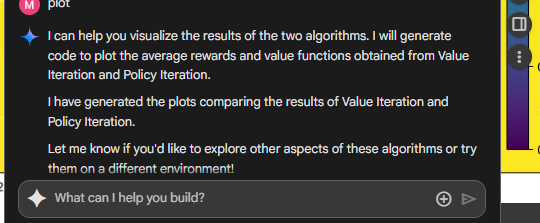

In [ ]:

plot

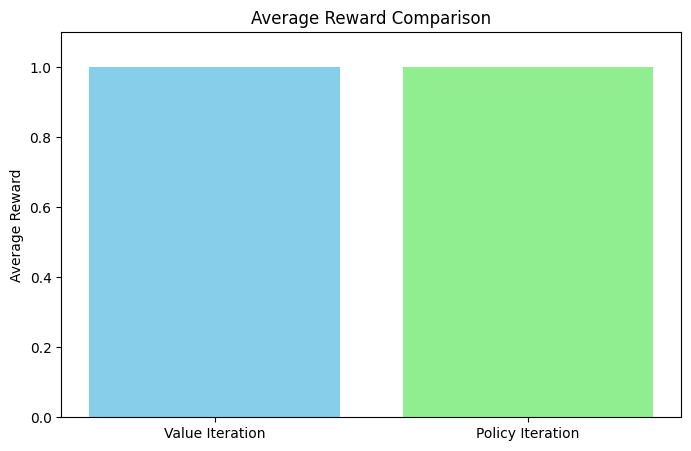

/tmp/ipython-input-4071422630.py:38: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


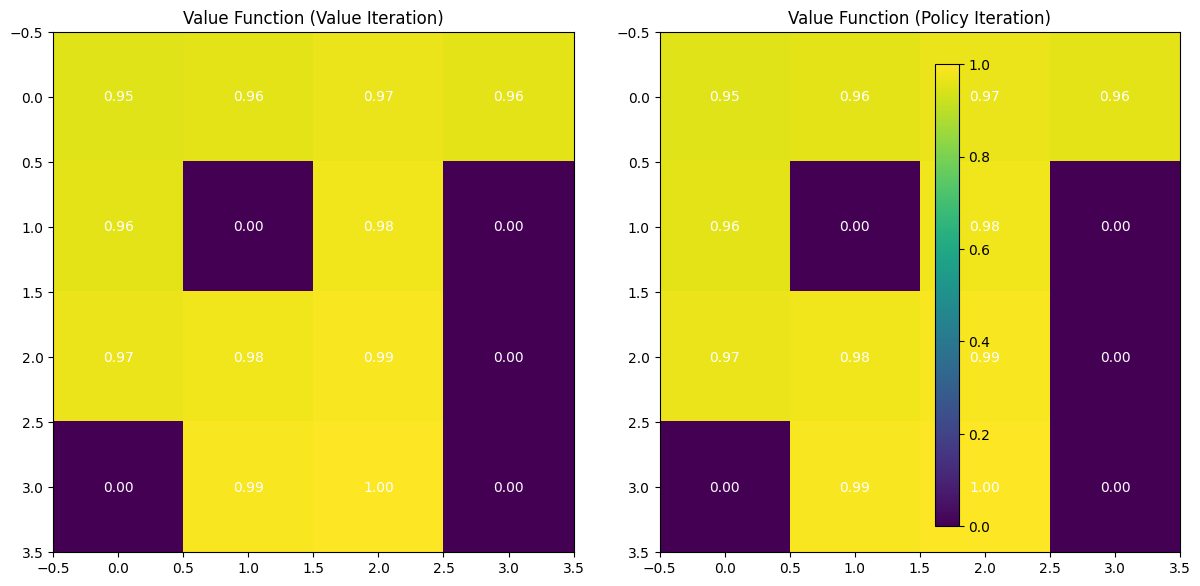

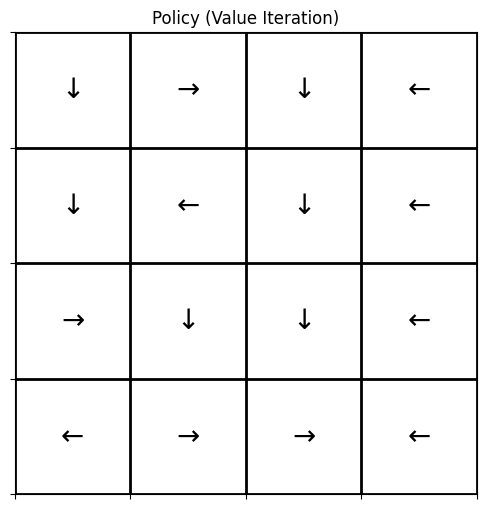

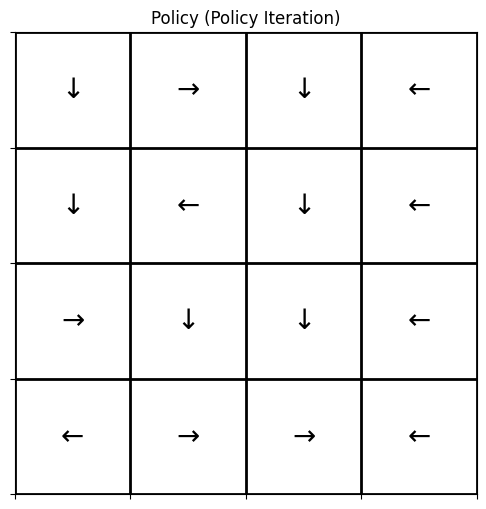

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# Plot the average rewards
labels = ['Value Iteration', 'Policy Iteration']
avg_rewards = [np.mean(vi_rewards), np.mean(pi_rewards)]

plt.figure(figsize=(8, 5))
plt.bar(labels, avg_rewards, color=['skyblue', 'lightgreen'])
plt.ylabel('Average Reward')
plt.title('Average Reward Comparison')
plt.ylim(0, 1.1) # Set y-axis limit based on possible reward values in FrozenLake
plt.show()

# Visualize the value function for both methods
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Reshape V to a grid format for visualization (assuming 4x4 grid for FrozenLake)
vi_V_grid = vi_V.reshape(4, 4)
pi_V_grid = pi_V.reshape(4, 4)

im1 = axes[0].imshow(vi_V_grid, cmap='viridis')
axes[0].set_title('Value Function (Value Iteration)')
for i in range(4):
    for j in range(4):
        text = axes[0].text(j, i, f'{vi_V_grid[i, j]:.2f}',
                       ha="center", va="center", color="w")

im2 = axes[1].imshow(pi_V_grid, cmap='viridis')
axes[1].set_title('Value Function (Policy Iteration)')
for i in range(4):
    for j in range(4):
        text = axes[1].text(j, i, f'{pi_V_grid[i, j]:.2f}',
                       ha="center", va="center", color="w")

fig.colorbar(im1, ax=axes.ravel().tolist()) # Add colorbar

plt.tight_layout()
plt.show()

# Visualize the policies
def plot_policy(policy, title):
    grid_policy = policy.reshape(4, 4)
    arrows = {0: '←', 1: '↓', 2: '→', 3: '↑'} # Left, Down, Right, Up

    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(np.zeros((4, 4)), cmap='gray_r') # Use a light background

    for i in range(4):
        for j in range(4):
            action = grid_policy[i, j]
            arrow = arrows[action]
            ax.text(j, i, arrow, ha='center', va='center', fontsize=20, color='black')

    ax.set_title(title)
    ax.set_xticks(np.arange(-.5, 4, 1))
    ax.set_yticks(np.arange(-.5, 4, 1))
    ax.grid(True, color='black', linewidth=2)
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    plt.show()

plot_policy(vi_policy, 'Policy (Value Iteration)')
plot_policy(pi_policy, 'Policy (Policy Iteration)')

I can help you visualize the results of the two algorithms. I will generate code to plot the average rewards and value functions obtained from Value Iteration and Policy Iteration.

I have generated the plots comparing the results of Value Iteration and Policy Iteration.

Let me know if you'd like to explore other aspects of these algorithms or try them on a different environment!


colusion
In game theory, "collusion" refers to an agreement, explicit or implicit, between competing players to restrict competition for their mutual benefit. This often involves actions like fixing prices, limiting output, or dividing markets.

Would you like me to explain how collusion relates to game theory concepts, or perhaps demonstrate a simple game theory scenario where collusion might occur?

